In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score 

In [2]:
size = 256
n_im = 45
images = np.empty((n_im, size, size))
for i in range(n_im):
    images[i] = np.log(np.genfromtxt('ruderman/image_{}.txt'.format(1+i))) #already log-transformed

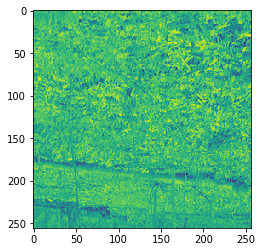

In [3]:
plt.imshow(images[10])

In [4]:
#subtract the mean
mean_log_luminescence = np.mean(images, axis = (1,2))
transformed_images = images - mean_log_luminescence[:,np.newaxis,np.newaxis]

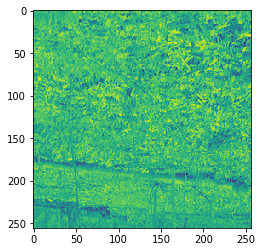

In [5]:
plt.figure()
plt.imshow(transformed_images[10])

In [6]:
transformed_images.mean(axis = 0).shape

(256, 256)

In [7]:
#construct the distribution 
n_bins = 101
bins = np.linspace(np.min(transformed_images), np.max(transformed_images), num = n_bins)
x = (bins[:-1] + bins[1:])/2
distr_luminescence = np.empty((n_im, n_bins-1))
for i in range(n_im):
    distr_luminescence[i], bin_edges = np.histogram(transformed_images[i].flatten(), density=True, bins = bins)
mean_luminescence = np.mean(distr_luminescence, axis = 0)
std_luminescence = np.std(distr_luminescence, axis = 0)

Text(0.5, 0, 'Log-luminance, L')

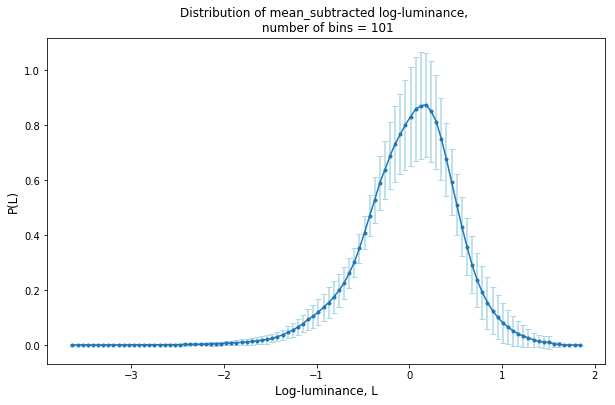

In [24]:
plt.figure(figsize = (10,6))
plt.title('Distribution of mean_subtracted log-luminance, \n number of bins = {}'.format(n_bins))
plt.errorbar(x, mean_luminescence,yerr =std_luminescence, ls = '-', marker = 'o',ms = 3, ecolor = 'lightblue', capsize = 3)
plt.ylabel('P(L)', fontsize = 12)
plt.xlabel('Log-luminance, L', fontsize = 12)

In [9]:
index_x_plus = np.where(x>1)
index_x_minus = np.where(x<-1)
x_plus = x[x>1]
x_minus = x[x<-1]
P_plus = mean_luminescence[index_x_plus]
P_minus = mean_luminescence[index_x_minus]

In [10]:
def func(x, a, b):
    return 

In [11]:
popt_plus,_= curve_fit(func, x_plus, P_plus)
popt_minus,_= curve_fit(func, x_minus, P_minus)

In [21]:
r2_plus = r2_score(P_plus, func(x_plus, *popt_plus))
r2_minus = r2_score(P_minus, func(x_minus, *popt_minus))

In [12]:
popt_plus

array([ 8.04410776, -4.52634086])

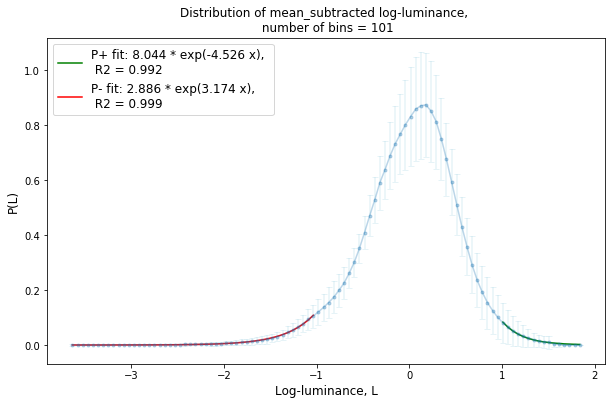

In [25]:
plt.figure(figsize = (10,6))
plt.title('Distribution of mean_subtracted log-luminance, \n number of bins = {}'.format(n_bins))

plt.errorbar(x, mean_luminescence,yerr =std_luminescence, ls = '-', marker = 'o',ms = 3, ecolor = 'lightblue', 
             capsize = 3, alpha = 0.3)
plt.plot(x_plus, func(x_plus, *popt_plus), 'g', 
         label='P+ fit: {:.3f} * exp({:.3f} x), \n R2 = {:.3f}'.format(popt_plus[0],popt_plus[1], r2_plus))
plt.plot(x_minus, func(x_minus, *popt_minus), 'red', 
         label='P- fit: {:.3f} * exp({:.3f} x), \n R2 = {:.3f}'.format(popt_minus[0],popt_minus[1], r2_minus))

plt.ylabel('P(L)', fontsize = 12)
plt.xlabel('Log-luminance, L', fontsize = 12)
plt.legend(fontsize = 12)